In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec


#wordcloud 
from wordcloud import WordCloud 

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


#filter warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Data Driven Analytics - 2/Sentiment Analysis Project

/content/gdrive/.shortcut-targets-by-id/1QpTu69UFzF7HZ9KMFY_n2cAd83BRs7HT/Data Driven Analytics - 2/Sentiment Analysis Project


In [ ]:
#!pip install xlrd
df=pd.read_csv('evtweets.csv')
df.head()

#The dataset consists of all those tweets which had likes >= 10.

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,16,16,16,451979107,DunkenKBliths,11219.0,51581.0,Creator of Animated Gifs\n' EV owners will be ...,Adelaide / South Australia,"Once you go EV, you don’t go back. And BMW int...",2018-01-31 23:29:36+00:00,11.0,2.0,23.0,1.0
1,55,55,55,2919448626,PalliThordarson,19942.0,10683.0,Professor and Director of the UNSW RNA Institu...,"UNSW Sydney, New South Wales",Third #NobelPrize plenary here at #ICONN2018 i...,2018-01-31 22:33:44+00:00,1.0,2.0,15.0,0.0
2,61,61,61,192589318,DavidBrin,42134.0,18758.0,"Author (The Postman, Earth, Existence,The Tran...",San Diego,"Going where no car has gone before, at speeds ...",2018-01-31 22:28:08+00:00,14.0,3.0,24.0,1.0
3,77,77,77,717313,arstechnica,1164934.0,138497.0,"Original news, reviews, analysis of tech trend...",NYC - Boston - Chicago - SF,Straight out of your Blade Runner 2049 school ...,2018-01-31 22:12:25+00:00,9.0,3.0,12.0,2.0
4,99,99,99,250547037,plugshare,26119.0,5292.0,PlugShare is the #1 App for EV drivers to find...,"El Segundo, CA",Volkswagen is serious about electric vehicle p...,2018-01-31 21:45:45+00:00,5.0,2.0,13.0,1.0


In [ ]:
df.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
43978,903930,26124,26124,536653962,Tomatrix22,274.0,7339.0,Spaceflight Enthusiast. Metal Enjoyer. Play gu...,United Kingdom,@scjessey @SciGuySpace He also owns a Model X ...,2020-12-01 01:03:02+00:00,0.0,1.0,22.0,0.0
43979,903942,26136,26136,28574479,Pflax1,15798.0,57317.0,EIC @ Red Bulletin; Past Features Editor @ THR...,Los Angeles,Electric cars are like pro cyclists who win th...,2020-12-01 00:35:16+00:00,0.0,4.0,24.0,0.0
43980,903946,26140,26140,456865788,AllanMargolin,36971.0,128666.0,"Husband, Dad. Creator of I ♥ Climate Scientist...",NYC USA,A #ClimateChange Breakthrough For Electric Car...,2020-12-01 00:25:02+00:00,9.0,3.0,14.0,4.0
43981,903952,26146,26146,216644462,FullyChargedDan,26929.0,47679.0,CEO & Presenter of the world’s no.1 #CleanEner...,Mainly LinkedIn & Instagram...,"“I suppose Climate Change is real, but Electri...",2020-12-01 00:14:16+00:00,23.0,44.0,198.0,4.0
43982,903953,26147,26147,14634720,Treehugger,349224.0,59087.0,Sustainability for all.,"New York, USA",SURPRISE! An industry-sponsored report suggest...,2020-12-01 00:13:02+00:00,8.0,2.0,19.0,4.0


In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'author_id', 'username',
       'author_followers', 'author_tweets', 'author_description',
       'author_location', 'text', 'created_at', 'retweets', 'replies', 'likes',
       'quote_count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43983 entries, 0 to 43982
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.2        43983 non-null  object 
 1   Unnamed: 0.1        43981 non-null  object 
 2   Unnamed: 0          43981 non-null  object 
 3   author_id           43981 non-null  object 
 4   username            43981 non-null  object 
 5   author_followers    43981 non-null  float64
 6   author_tweets       43980 non-null  float64
 7   author_description  42913 non-null  object 
 8   author_location     36501 non-null  object 
 9   text                43978 non-null  object 
 10  created_at          43977 non-null  object 
 11  retweets            43977 non-null  float64
 12  replies             43977 non-null  float64
 13  likes               43977 non-null  float64
 14  quote_count         43977 non-null  float64
dtypes: float64(6), object(9)
memory usage: 5.0+ MB


# Data Cleaning

In [ ]:
df1=df[["created_at","username","text"]]

In [ ]:
def slicedate(date):
  x=[]
  for i in date:
    t=str(i)
    x.append(t[:10])

  return x

In [ ]:
df1.created_at=slicedate(df1.created_at)
df1=df1.rename(columns={'created_at':'date','text':'tweet'})
df1

,date,username,tweet
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int..."
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ..."
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...
...,...,...,...
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri..."


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43983 entries, 0 to 43982
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      43983 non-null  object
 1   username  43981 non-null  object
 2   tweet     43978 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [ ]:
df1.nunique()
# so there were 193 duplicate tweets

date         1097
username    18716
tweet       43661
dtype: int64

In [ ]:
df1.shape

(43983, 3)

In [ ]:
# check for duplicate tweet
df1.duplicated(keep='first').sum()

19

In [ ]:
# dropping all the duplicates tweets and keeping only the first values
df1 = df1.drop_duplicates(subset="tweet",keep="first")
df1

,date,username,tweet
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int..."
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ..."
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...
...,...,...,...
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri..."


In [ ]:
df1.shape

(43662, 3)

In [ ]:
def hashtag(tweet):
    x=[]
    for i in tweet:
        y=[]
        z=i.split()
        for j in z:
            if j[0]=='#':
                y.append(j)
        
        if len(y)>0: x.append(y)
        else: x.append(np.nan)
        
    return x

In [ ]:
df2=df1.copy()

In [ ]:
#String Conversion

def strcon(tweet):
  x=[]
  for i in tweet:
    x.append(str(i))

  return x

df2.tweet=strcon(df2.tweet)

In [ ]:
df2['hashtags']=hashtag(df2['tweet'])
df2

,date,username,tweet,hashtags
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int...","[#BMW, #EV, #ElectricCar, #electric, #battery,..."
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...,"[#NobelPrize, #ICONN2018, #nano]"
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]"
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...,NaN
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric..."
...,...,...,...,...
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...,NaN
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange]
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN


In [ ]:
#initializing Lemmatizer and stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

#  Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
#Stopwords are the English words which does not add much meaning to a sentence.

In [ ]:
# define a function to clean the tweet.
def clean_tweet(tweet):

    
    tweet = tweet.lower() # Convert tweet to lower case
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet) # Replace URLs with a space in the message
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet) #Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet) #Replace  usernames with space. The usernames are any word that starts with @.
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet) #Replace everything not a letter or apostrophe with space
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] ) #Remove single letter words
    
    tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]) #lemmatize, tokenize (nouns and verb), remove stop words, filter all the non-alphabetic words, then jointhem again

    tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]
    return tweet 

In [ ]:
# define a function to clean the Hashtags.
def clean_hashtags(hashtags):

    if hashtags:
        hashtags = hashtags.lower() #Convert hashtags to lower case
        hashtags = re.sub('\$[a-zA-Z0-9]*', ' ', hashtags) #Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
        hashtags = re.sub('[^a-zA-Z]', ' ', hashtags) #Replace everything not a letter or apostrophe with space
        hashtags=hashtags.strip()  # Removes any spaces or specified characters at the start and end of hashtags.
    return hashtags

In [ ]:
import nltk
nltk.download('wordnet') # You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more.
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# clean the tweets and create two columns: tokenized tweet and whole tweet
df2["clean_tweet"]=df2["tweet"].apply(lambda x:clean_tweet(x))
df2["cleaned_tweet"]=df2["clean_tweet"].apply(lambda x:' '.join(x))

In [ ]:
df2       

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int...","[#BMW, #EV, #ElectricCar, #electric, #battery,...","[go, ev, go, back, bmw, intend, keep, way, bmw...",go ev go back bmw intend keep way bmw ev elect...
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...,"[#NobelPrize, #ICONN2018, #nano]","[third, nobelprize, plenary, iconn, city, time...",third nobelprize plenary iconn city time physi...
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...,NaN,"[straight, blade, runner, school, aesthetic, eh]",straight blade runner school aesthetic eh
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...
...,...,...,...,...,...,...
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...,NaN,"[also, own, model, daughter, model, elon, alwa...",also own model daughter model elon always make...
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...


In [ ]:
df2.columns

Index(['date', 'username', 'tweet', 'hashtags', 'clean_tweet',
       'cleaned_tweet'],
      dtype='object')

In [ ]:
export=df2[df2.columns[[2,4]]]
export.to_csv('EVT.csv')

In [ ]:
df2.tail()

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...,NaN,"[also, own, model, daughter, model, elon, alwa...",also own model daughter model elon always make...
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...
43982,2020-12-01,Treehugger,SURPRISE! An industry-sponsored report suggest...,"[#climatechange., #emissions]","[surprise, industry, sponsor, report, suggest,...",surprise industry sponsor report suggest elect...


In [ ]:
#Converting Date column to DateTime Object and creating two new columns:month and year
df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

In [ ]:
df2.head()

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int...","[#BMW, #EV, #ElectricCar, #electric, #battery,...","[go, ev, go, back, bmw, intend, keep, way, bmw...",go ev go back bmw intend keep way bmw ev elect...,1.0,2018.0
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...,"[#NobelPrize, #ICONN2018, #nano]","[third, nobelprize, plenary, iconn, city, time...",third nobelprize plenary iconn city time physi...,1.0,2018.0
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...,NaN,"[straight, blade, runner, school, aesthetic, eh]",straight blade runner school aesthetic eh,1.0,2018.0
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...,1.0,2018.0


In [ ]:
df2.rename(columns={'clean_tweet':'clean_tweet_n'})

,date,username,tweet,hashtags,clean_tweet_n,cleaned_tweet,month,year
0,2018-01-31,DunkenKBliths,"Once you go EV, you don’t go back. And BMW int...","[#BMW, #EV, #ElectricCar, #electric, #battery,...","[go, ev, go, back, bmw, intend, keep, way, bmw...",go ev go back bmw intend keep way bmw ev elect...,1.0,2018.0
1,2018-01-31,PalliThordarson,Third #NobelPrize plenary here at #ICONN2018 i...,"[#NobelPrize, #ICONN2018, #nano]","[third, nobelprize, plenary, iconn, city, time...",third nobelprize plenary iconn city time physi...,1.0,2018.0
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0
3,2018-01-31,arstechnica,Straight out of your Blade Runner 2049 school ...,NaN,"[straight, blade, runner, school, aesthetic, eh]",straight blade runner school aesthetic eh,1.0,2018.0
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...,1.0,2018.0
...,...,...,...,...,...,...,...,...
43978,2020-12-01,Tomatrix22,@scjessey @SciGuySpace He also owns a Model X ...,NaN,"[also, own, model, daughter, model, elon, alwa...",also own model daughter model elon always make...,12.0,2020.0
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...,12.0,2020.0
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...,12.0,2020.0
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...,12.0,2020.0


In [ ]:
df2.tweet[5111]

'I wrote for @Ricochet about how our tax dollars subsidizing electronic cars is also subsidizing child labor in mines in Africa: https://t.co/12XHRuhIfO'

In [ ]:
df2.cleaned_tweet[5111]

'write tax dollar subsidize electronic car also subsidize child labor mine africa'

In [ ]:
df2.username[5111]

'bethanyshondark'

In [ ]:
list(df2['cleaned_tweet'][(df2['year']==2018)&(df2['month']==6)])   

['wonder play car friend electric orchestra november would upset people would feel like welcome change',
 'cobalt lithium nickel boom drive china electric car',
 "denmark rethink ev incentive market collapse electric car wonderful ' need bribe people buy",
 'sweden pave way yet',
 "' every car electric version even normal car anymore ' make sense",
 'bike scooter startup lime plan offer ultra compact electric vehicle end',
 'hydrogen fcev distraction thread oil company certain motor manufacturer happy promote hydrogen fcev car useful distraction battery electric bev car',
 'electric car pay emission tax cause congestion despite exhaust emission cyclist pay tax cyclist cause emission relieve congestion',
 'yes car go make street better av electric car thing driverless future city frankly bollock stuff ice cream cone elon musk shit unicorn crap',
 'electric car autonomous vehicle transform auto industry next two decade lot hype',
 'smoke choke port rid along toyota hydrogen power semi el

# Getting Labels

In [ ]:
## Removing all tweets which do not have the word:"Car"
df_cars=df2.copy()
df_cars=df2[df2["cleaned_tweet"].str.contains(" car ")]
df_cars.shape

(33855, 8)

In [ ]:
#df_cars=df_cars.reset_index()

In [ ]:
#df_cars['clean_tweet']=uniquewords(df_cars['clean_tweet'])

In [ ]:
#Converting the "clean_tweet" column in the format supported by embeddings.
sent = [row for row in df2["clean_tweet"]]
#use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

['third',
 'nobelprize',
 'plenary',
 'iconn',
 'city',
 'time',
 'physic',
 'laureate',
 'steven',
 'chu',
 'impressively',
 'equally',
 'ease',
 'explain',
 'superesolution',
 'microscopy',
 'upconversion',
 'nano',
 'amp',
 'need',
 'better',
 'battery',
 'technology',
 'electric',
 'car']

In [ ]:
#### LEARNING RATE SHOULD BE LOW

#Initializing the word2vec model

import multiprocessing

w2v_model = Word2Vec(min_count=20,
                     window=5,
                     vector_size =300,
                     sample=1e-5, 
                     alpha=0.0001, 
                     min_alpha=0.000005, 
                     negative=20,
                     seed= 42,
                     workers=multiprocessing.cpu_count()-1)


#building vocab of the word2vec model from the custom data
w2v_model.build_vocab(sentences, progress_per=50000)

In [ ]:
#training the word2vec model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(2511972, 19438770)

In [ ]:
#?w2v_model.train
#Update the model's neural weights from a sequence of sentences.

In [ ]:
w2v_model.wv.most_similar(positive=["battery"]) 

[('slow', 0.19989043474197388),
 ('award', 0.1993016004562378),
 ('yesterday', 0.1900796890258789),
 ('design', 0.18985982239246368),
 ('show', 0.1857784539461136),
 ('mainly', 0.17667065560817719),
 ('researcher', 0.1750582456588745),
 ('ongoing', 0.17361555993556976),
 ('quickly', 0.17212362587451935),
 ('electric', 0.16349565982818604)]

In [ ]:
#saving the word2vec model
w2v_model.save("word2vec.model")

In [ ]:
#Loading the word2vec model
word_vectors = Word2Vec.load("word2vec.model").wv

In [ ]:
#Feeding the embeddings to a KMeans model to cluster words into positive, negative, and neutral clusters
model = KMeans(n_clusters=3, max_iter=1000, random_state=42, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [ ]:
centroids=model.cluster_centers_
centroids

array([[-1.36622471e-05, -1.41050339e-04, -5.23488635e-05,
         5.70565357e-05, -3.95234638e-05, -4.82087731e-05,
         5.35368386e-05,  1.88371483e-04, -8.18175391e-05,
         1.71593665e-04,  3.00035448e-04,  1.67655180e-05,
        -2.40855793e-04,  1.17136366e-04, -5.97821689e-05,
         1.81505996e-04,  2.57012356e-04, -6.45285965e-05,
        -1.69678846e-04, -3.04760204e-04,  2.44120681e-04,
        -5.03672433e-05, -2.00599169e-06, -1.06714556e-04,
        -1.32870845e-04,  2.01731772e-04, -1.18941033e-04,
         1.03456316e-04,  5.69606338e-06,  1.17542360e-04,
         4.70233881e-05, -9.88988998e-05, -3.35260961e-04,
         1.83878218e-05,  5.39820750e-05,  1.29288499e-04,
         1.47131937e-04, -3.31829818e-04, -3.27464918e-04,
         3.87598987e-05,  1.84015707e-05,  1.43888139e-05,
        -1.92106072e-04,  2.09758150e-04,  2.43248253e-04,
         1.13913105e-04,  1.53411726e-04, -5.53877854e-05,
        -4.54567447e-04, -6.67152705e-05, -9.58174764e-0

In [ ]:
for i in range(len(centroids)):
  print(i+1,':',len(centroids[i]))

1 : 300
2 : 300
3 : 300


In [ ]:
# check what we have in each cluster to label the clusters
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=300, restrict_vocab=None)  

[('automation', 0.2868877351284027),
 ('tax_credit', 0.2867698669433594),
 ('car', 0.28401392698287964),
 ('see', 0.2664680778980255),
 ('election', 0.2648578882217407),
 ("'", 0.259558767080307),
 ('time', 0.2586580216884613),
 ('laugh', 0.255258709192276),
 ('electric', 0.24968601763248444),
 ('transition', 0.2481972575187683),
 ('switzerland', 0.23000498116016388),
 ('new', 0.2210516333580017),
 ('brown', 0.21997885406017303),
 ('plug_hybrid', 0.21635733544826508),
 ('lotus', 0.21563822031021118),
 ('electrek', 0.20897336304187775),
 ('mention', 0.20260564982891083),
 ('think', 0.20233206450939178),
 ('coffee', 0.2013006955385208),
 ('build', 0.1994745433330536),
 ('open', 0.19939462840557098),
 ('goal', 0.1988924741744995),
 ('everything', 0.19823595881462097),
 ('norway', 0.19739525020122528),
 ('world', 0.19495004415512085),
 ('million', 0.19402959942817688),
 ('piccard', 0.19176962971687317),
 ('nothing', 0.19050750136375427),
 ('win', 0.19039258360862732),
 ('rapid', 0.18895576

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=300, restrict_vocab=None)  

[('global_economy', 0.3268123269081116),
 ('electric', 0.23273997008800507),
 ('give_u', 0.2279854267835617),
 ('move', 0.21736890077590942),
 ('match', 0.21514081954956055),
 ('car', 0.21359145641326904),
 ('gas_power', 0.21016868948936462),
 ('hill', 0.208724707365036),
 ('autonomous_drive', 0.20825161039829254),
 ('would_happen', 0.20022563636302948),
 ('transportation_system', 0.2000962793827057),
 ('around', 0.19859068095684052),
 ('nuclear', 0.1965658962726593),
 ('gap', 0.1954459846019745),
 ('grant', 0.19367070496082306),
 ('today', 0.19259104132652283),
 ('kill_job', 0.19145157933235168),
 ('green', 0.18942351639270782),
 ('generation', 0.18909725546836853),
 ('neighbor', 0.18867716193199158),
 ('last_year', 0.1885681450366974),
 ('must', 0.1870906800031662),
 ('older', 0.18621449172496796),
 ('year', 0.18558336794376373),
 ('energy_revolution', 0.18469949066638947),
 ('people', 0.18326498568058014),
 ('business_model', 0.18202829360961914),
 ('visionary', 0.1795414835214615),

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[2], topn=300, restrict_vocab=None)  

[('car', 0.43227893114089966),
 ('package', 0.3449821472167969),
 ('electric', 0.33674660325050354),
 ("'", 0.2950381934642792),
 ('essential', 0.24618947505950928),
 ('motorist', 0.24215812981128693),
 ('get_cleaner', 0.23770907521247864),
 ('rail', 0.23673513531684875),
 ('pollution', 0.22687694430351257),
 ('amount', 0.22565706074237823),
 ('king', 0.22498798370361328),
 ('property', 0.22200173139572144),
 ('amp', 0.22096998989582062),
 ('trillion', 0.21933145821094513),
 ('hydrogen', 0.21137095987796783),
 ('automotive', 0.21055059134960175),
 ('industry', 0.20838545262813568),
 ('basis', 0.2064274549484253),
 ('green_number', 0.20528532564640045),
 ('road', 0.202971413731575),
 ('supply', 0.2015303373336792),
 ('battery', 0.20050008594989777),
 ('reveal', 0.20025432109832764),
 ('news', 0.20023325085639954),
 ('best', 0.19942165911197662),
 ('golf', 0.199234277009964),
 ('co_emission', 0.19916598498821259),
 ('check', 0.19716092944145203),
 ('tesla', 0.19611699879169464),
 ('cluel

In [ ]:
# Labelling the clusters based on the type of words they carry
positive_cluster_center = model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]
neutral_cluster_center= model.cluster_centers_[2]

In [ ]:
#Creating a DataFrame of words with their embeddings and cluster values
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [ ]:
#?word_vectors
#Used to perform operations on the vectors such as vector lookup, distance, similarity etc.

In [ ]:
#Assigning 1 to positive values, 0 to neutral and -1 for negative values
words['cluster_value'] = [1 if i==2 else 0 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [ ]:
words

,words,vectors,cluster,cluster_value,closeness_score
0,car,"[-0.00274044, 0.001287948, 0.0001924403, -0.00...",2,1,25.286545
1,electric,"[-0.0009103185, 0.0016804304, -0.004038351, 0....",2,1,23.989013
2,',"[0.0007742556, 0.0015286959, 0.0010771257, -0....",2,1,26.930906
3,vehicle,"[-0.0033050028, -0.0032561114, -0.0021919473, ...",0,0,30.831139
4,new,"[0.0025262954, -0.000337548, 0.0029392412, 0.0...",1,-1,28.735060
...,...,...,...,...,...
3136,cook,"[-0.0016711907, 0.0020648395, -0.0018267364, -...",0,0,32.249144
3137,bust,"[-0.0016172546, 0.003089732, 0.002832904, -0.0...",1,-1,30.887954
3138,ugly,"[-0.001583076, -0.0021282756, -0.0023184025, 0...",2,1,31.394122
3139,gay,"[0.0013401151, 0.0025881224, 0.0011376207, 0.0...",0,0,30.611062


In [ ]:
words[words["cluster_value"]==-1].sort_values("closeness_score")

,words,vectors,cluster,cluster_value,closeness_score
1138,ignore,"[0.003061763, 0.0012976538, 0.0015766372, 0.00...",1,-1,27.439385
1673,refuse,"[0.0027485343, 0.0018839197, -0.002929597, -3....",1,-1,27.815652
963,bigger,"[-0.0021417371, 0.0011798671, 0.0016675837, 0....",1,-1,27.945490
1802,dude,"[0.0014026404, 0.00021170243, 0.001533039, -4....",1,-1,28.014598
147,home,"[-0.0013494722, 0.0020364318, -0.0029033846, -...",1,-1,28.045934
...,...,...,...,...,...
2648,surpass,"[0.0020068302, -0.0006266157, 0.0024364523, -0...",1,-1,32.440409
712,progress,"[-1.9460747e-05, -0.0020719415, 0.0020686812, ...",1,-1,32.597766
2175,sale_soar,"[0.00088640756, -0.0024051797, 0.0012109845, 0...",1,-1,32.601154
568,carbon,"[-0.0020201602, 0.003205352, 0.0003864685, 0.0...",1,-1,32.605277


In [ ]:
positive = ['good','clean','walk','cycle','community','help',"health","get","want","light","superb",
           "amaze", "brilliant", "awesome","win","better"]
neutral = ['can','go','going','got','air','climate','in','shall',"he","happens","grocery","person",
          'storage','space','really',"time","apartment"]
negative= ['pathetic','stupid','mad','idiot','insane','sad','tough','annoy','boo','']
for i in positive:
    words.loc[words["words"]==i,"cluster_value"]=1
    
for i in neutral:
    words.loc[words["words"]==i,"cluster_value"]=0
    
for i in negative:
    words.loc[words["words"]==i,"cluster_value"]=-1


In [ ]:
words[words["words"]=="insane"]

,words,vectors,cluster,cluster_value,closeness_score
1468,insane,"[-0.0021509838, 0.0019957216, -0.0033047947, 0...",0,-1,29.868752


In [ ]:
# from gensim.models import Word2Vec
# from gensim.models.callbacks import CallbackAny2Vec

# # Define a custom callback to track loss during training
# class LossCallback(CallbackAny2Vec):
#     def _init_(self):
#         self.epoch = 1
#         self.losses = []

#     def on_epoch_end(self, model):
#         loss = model.get_latest_training_loss()
#         self.losses.append(loss)
#         print(f'Loss after epoch {self.epoch}: {loss}')
#         self.epoch += 1

# # Load your dataset and preprocess it into a list of sentences
# sentences = [...]  # Your list of sentences here

# # Train the initial word2vec model
# model = Word2Vec(sentences, size=300, window=5, min_count=5, workers=4, sg=1, iter=10)

# # Define your custom callback to track loss during fine-tuning
# loss_callback = LossCallback()

# # Fine-tune the word2vec model
# model.train(sentences, total_examples=model.corpus_count, epochs=10, callbacks=[loss_callback])

# # Access the learned word vectors
# word_vectors = model.wv

# # Get the vector for a specific word
# word = 'example_word'
# vector = word_vectors[word]

# print(f'Word vector for "{word}": {vector}')

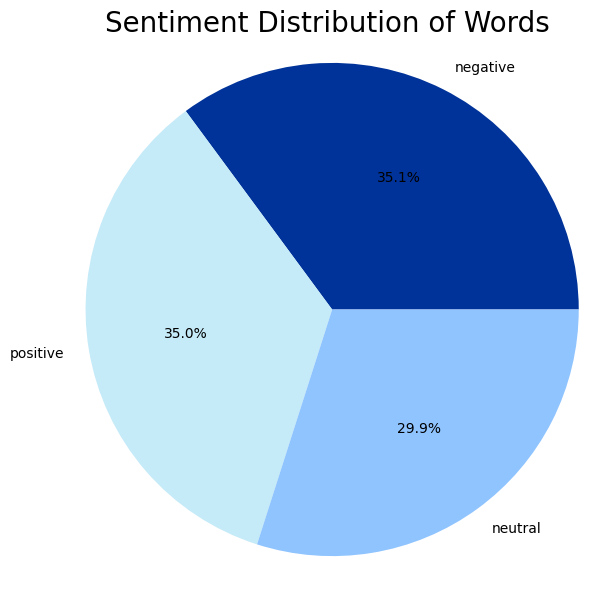

,index,sentiments
0,negative,1103
1,positive,1098
2,neutral,940


In [ ]:
# Plotting pie chart of Sentiment Distribution of words          
emotion = {0: "neutral",
           1: "positive",         
          -1: "negative"}                     

words["sentiments"]=words["cluster_value"].map(emotion)


fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["cyan","pink","yellow"]
sns.set_palette(palette=['#003399','#C5EAF8','#8FC4FF'])
df_pie=words["sentiments"].value_counts().reset_index()
plt.pie(df_pie["sentiments"],labels=df_pie["index"],radius=2,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution of Words ", fontsize=20)
plt.show()
df_pie

In [ ]:
def get_sentiments(x,sent_dict):

    total=0
    count=0
    test=x["clean_tweet"]
    for t in test:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.15 else 1 if avg >0.15 else 0
    return sentiment

In [ ]:
# creating a dictionary of the word and its cluster value
words_dict = dict(zip(words.words, words.cluster_value))

In [ ]:
# adding sentiment column
df_cars["sentiment"]=df_cars.apply(get_sentiments,args=(words_dict,),axis=1)

In [ ]:
df_cars.date

2       2018-01-31
4       2018-01-31
5       2018-01-31
6       2018-01-31
7       2018-01-31
           ...    
43977   2020-12-01
43979   2020-12-01
43980   2020-12-01
43981   2020-12-01
43982   2020-12-01
Name: date, Length: 33855, dtype: datetime64[ns]

In [ ]:
# checking the value counts of each sentiment
df_cars["sentiment"].value_counts()

 1    18656
 0    13813
-1     1386
Name: sentiment, dtype: int64

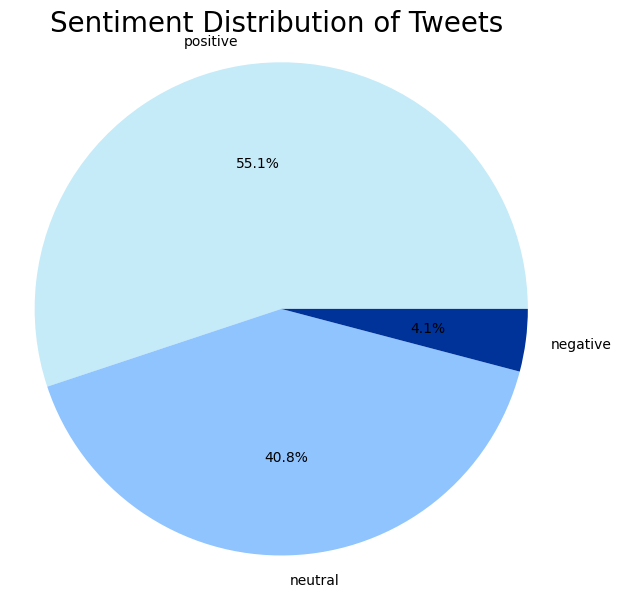

,index,sentiments_val
0,positive,18656
1,neutral,13813
2,negative,1386


In [ ]:
# Plotting pie chart of Sentiment Distribution of tweets
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
df_cars["sentiments_val"]=df_cars["sentiment"].map(emotion)
df_pie=df_cars["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(df_pie["sentiments_val"],labels=df_pie["index"],radius=2,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets ", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
df_pie

In [ ]:
df_negative = df_cars[df_cars["sentiment"]==-1]

#Data Visualization

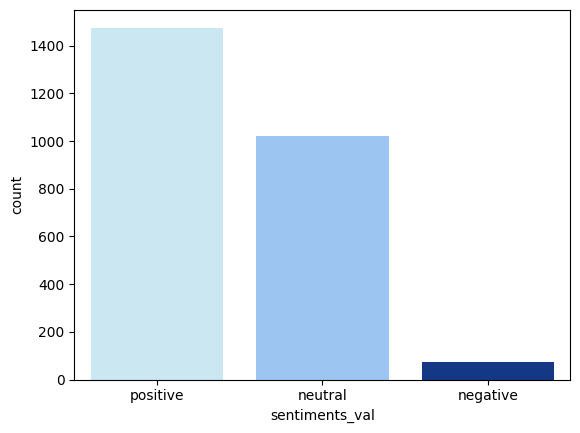

In [ ]:
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
data_list=[" ford"," bmw "," tesla "," audi "," bollingermotors "," hyundai "," dodge "]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
df_car_sent=df_car_sent.sort_values('sentiment',ascending=False)
sns.countplot(x=df_car_sent["sentiments_val"]);

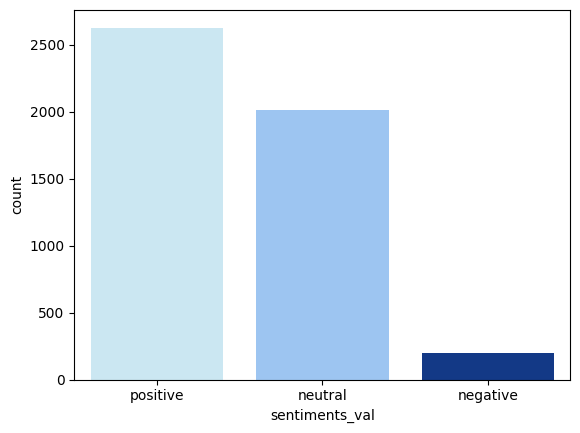

In [ ]:
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
data_list=["costs","batteries"," climate "," fuel "," price "," tax ","afford","privilege","money"]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
df_car_sent=df_car_sent.sort_values('sentiment',ascending=False)
sns.countplot(x=df_car_sent["sentiments_val"]);

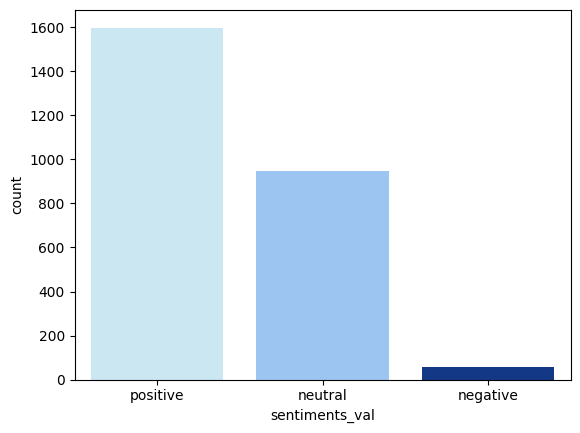

In [ ]:
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
data_list=["tesla"]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
df_car_sent=df_car_sent.sort_values('sentiment',ascending=False)
sns.countplot(x=df_car_sent["sentiments_val"]);

In [ ]:
df_car_sent

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0,1,positive
26813,2019-11-09,TeslaNY,Electric Cars Are Changing the Cost of Driving...,"[#Tesla, #EV]","[electric, car, change, cost, drive, tesla, ev]",electric car change cost drive tesla ev,11.0,2019.0,1,positive
26728,2019-11-12,niktaylorde,"Just as suspected, stock markets for Tesla, co...",NaN,"[suspect, stock, market, tesla, company, produ...",suspect stock market tesla company produce ele...,11.0,2019.0,1,positive
26704,2019-11-12,griskitkat,Electric cars would have been standard for dec...,NaN,"[electric, car, would, standard, decade, petro...",electric car would standard decade petroleum i...,11.0,2019.0,1,positive
26665,2019-11-13,globaltimesnews,#Tesla has obtained a mass production license ...,[#Tesla],"[tesla, obtain, mass, production, license, pur...",tesla obtain mass production license pure elec...,11.0,2019.0,1,positive
...,...,...,...,...,...,...,...,...,...,...
4295,2018-06-23,TurnerNovak,Great Tesla points by @Gfilche\n\nTesla is the...,NaN,"[great, tesla, point, tesla, apple, car, brand...",great tesla point tesla apple car brand insane...,6.0,2018.0,-1,negative
26124,2019-11-22,LanceUlanoff,I like Tesla\nI like @elonmusk \nI like electr...,NaN,"[like, tesla, like, like, electric, car, like,...",like tesla like like electric car like tech ev...,11.0,2019.0,-1,negative
19930,2019-07-18,TeslaHistorian,"""And while Tesla has earned a reputation for m...",NaN,"[tesla, earn, reputation, miss, delivery, date...",tesla earn reputation miss delivery date merce...,7.0,2019.0,-1,negative
18425,2019-06-23,TeslaOpinion,Tesla #Model3 - What its like to drive and wh...,"[#Model3, #LoveTesla]","[tesla, model, like, drive, buy, one, problem,...",tesla model like drive buy one problem drive m...,6.0,2019.0,-1,negative


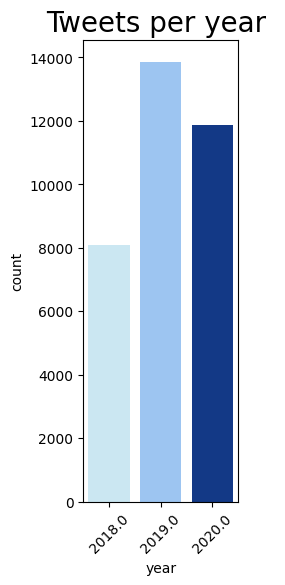

In [ ]:
# plot Tweets count
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
plt.subplots(figsize = (2,6))
chart = sns.countplot(x="year",data=df_cars);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Tweets per year ", fontsize=20)
#plt.savefig("images/Products Count.png")
plt.show();

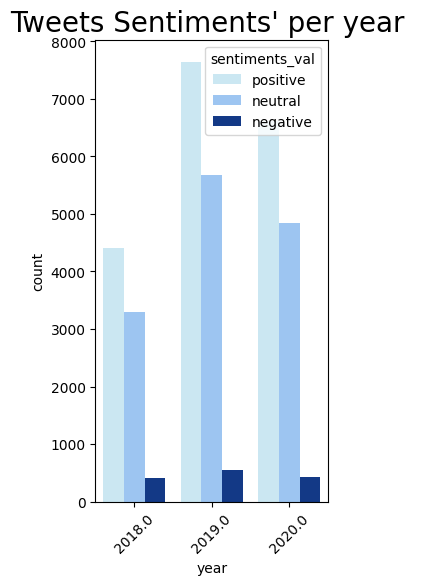

In [ ]:
# plotting Tweets Sentiments for each year
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
plt.subplots(figsize = (3,6))
chart = sns.countplot(x="year",data=df_cars,hue="sentiments_val");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Tweets Sentiments' per year ", fontsize=20)
#plt.savefig("images/Tweets_per_year.png")
plt.show();

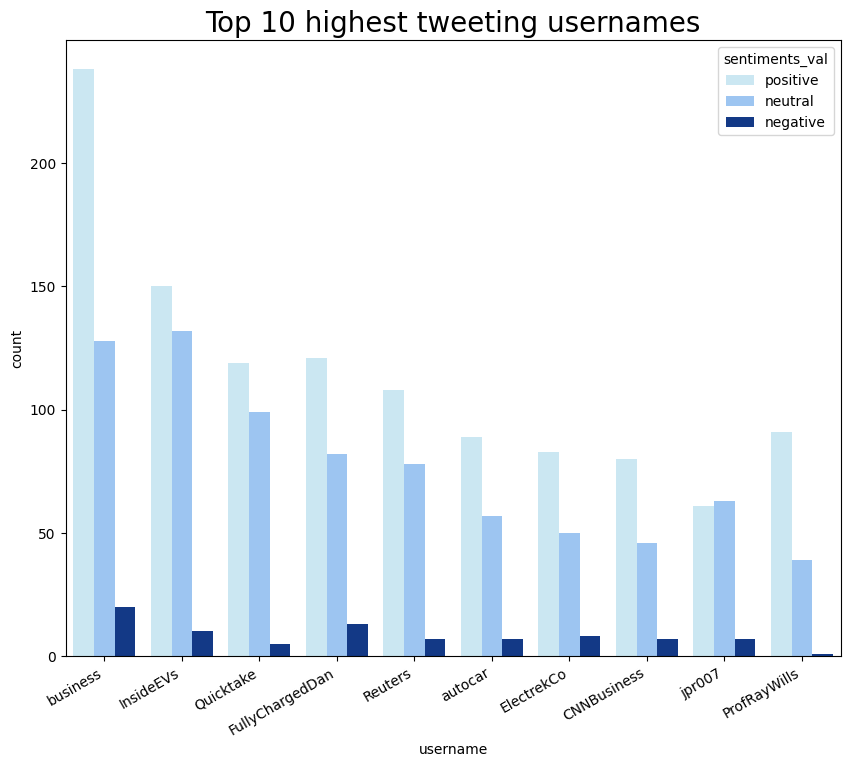

In [ ]:
# Top 10 highest tweeting usernames
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
plt.subplots(figsize = (10,8))
plt.title("Top 10 highest tweeting usernames", fontsize=20)
chart=sns.countplot(x="username",hue="sentiments_val",data=df_cars,
                    order= df_cars["username"].value_counts().iloc[:10].index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
#Graph of Top 10 hashtags 

In [ ]:
df2.hashtags

0        [#BMW, #EV, #ElectricCar, #electric, #battery,...
1                         [#NobelPrize, #ICONN2018, #nano]
2                                  [#FalconHeavy, #SpaceX]
3                                                      NaN
4        [#VW, #Volkswagen, #electricvehicle, #electric...
                               ...                        
43978                                                  NaN
43979                                                  NaN
43980                                     [#ClimateChange]
43981                                                  NaN
43982                        [#climatechange., #emissions]
Name: hashtags, Length: 43662, dtype: object

#Data Modeling

In [ ]:
df_cars.head()

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0,1,positive
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...,1.0,2018.0,0,neutral
5,2018-01-31,DunkenKBliths,At the crossroads...\n\nIn the near future whe...,"[#ev, #electricvehicles, #tesla, #animals, #el...","[crossroad, near, future, electric, car, auton...",crossroad near future electric car autonomous ...,1.0,2018.0,0,neutral
6,2018-01-31,FullyChargedDan,"VW plans to produce 1,500 electric cars per da...",NaN,"[vw, plan, produce, electric, car, per, day, z...",vw plan produce electric car per day zwickau f...,1.0,2018.0,-1,negative
7,2018-01-31,TEConnectivity,"Steven Merkt, President Transportation Solutio...",NaN,"[steven, merkt, president, transportation, sol...",steven merkt president transportation solution...,1.0,2018.0,1,positive


In [ ]:
df_cars.tail()

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
43977,2020-12-01,NVanSpartan,My sons grade 8 science project. Electric cars...,NaN,"[son, grade, science, project, electric, car, ...",son grade science project electric car v gas m...,12.0,2020.0,-1,negative
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...,12.0,2020.0,1,positive
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...,12.0,2020.0,1,positive
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...,12.0,2020.0,0,neutral
43982,2020-12-01,Treehugger,SURPRISE! An industry-sponsored report suggest...,"[#climatechange., #emissions]","[surprise, industry, sponsor, report, suggest,...",surprise industry sponsor report suggest elect...,12.0,2020.0,1,positive


In [ ]:
def days(dates):
  new=[]
  for i in dates:
    x=str(i)
    new.append(x[8:10])

  return new

df_cars['day']=days(df_cars['date'])

In [ ]:
from scipy import stats
predsent=df_cars.groupby(['year','month','day'])['date','sentiment'].agg(lambda x: x.mean())
predsent

date  sentiment
year   month day                      
2018.0 1.0   01  2018-01-01   0.437500
             02  2018-01-02   0.545455
             03  2018-01-03   0.645161
             04  2018-01-04   0.650000
             05  2018-01-05   0.485714
...                     ...        ...
2020.0 12.0  27  2020-12-27   0.516129
             28  2020-12-28   0.607843
             29  2020-12-29   0.510638
             30  2020-12-30   0.625000
             31  2020-12-31   0.378378

[1096 rows x 2 columns]

In [ ]:
def label(sent):
  final=[]
  for i in sent:
    temp='positive' if i>0.8 else 'negative' if i<0.6 else 'neutral'
    final.append(temp)
  
  return final

predsent['sent_lab']=label(predsent.sentiment)
predsent

date  sentiment  sent_lab
year   month day                                
2018.0 1.0   01  2018-01-01   0.437500  negative
             02  2018-01-02   0.545455  negative
             03  2018-01-03   0.645161   neutral
             04  2018-01-04   0.650000   neutral
             05  2018-01-05   0.485714  negative
...                     ...        ...       ...
2020.0 12.0  27  2020-12-27   0.516129  negative
             28  2020-12-28   0.607843   neutral
             29  2020-12-29   0.510638  negative
             30  2020-12-30   0.625000   neutral
             31  2020-12-31   0.378378  negative

[1096 rows x 3 columns]

In [ ]:
predsent.to_csv('KMeans_Sentiment.csv',index=False)

In [ ]:
postweets=df_cars[['clean_tweet','sentiments_val']][df_cars.sentiments_val=='positive']
postweets

,clean_tweet,sentiments_val
2,"[go, car, go, speed, car, ever, reach, teslain...",positive
7,"[steven, merkt, president, transportation, sol...",positive
21,"[mercedes, reveal, plan, conquer, electric, ca...",positive
23,"[industry, look, scheme, amp, incentive, group...",positive
24,"[bp, install, charge, point, electric, car, uk...",positive
...,...,...
43973,"[people, worry, put, food, table, want, retrof...",positive
43976,"[carmaker, expect, million, electric, car, ger...",positive
43979,"[electric, car, like, pro, cyclist, win, tour,...",positive
43980,"[climatechange, breakthrough, electric, car, l...",positive


In [ ]:
#postweets.clean_tweet[600]==postweets.clean_tweet[611]

In [ ]:
df_cars.iloc[600]

date                                            2018-01-03 00:00:00
username                                            charlesmilander
tweet             Toyota to introduce 10 electric cars by mid-20...
hashtags                                                        NaN
clean_tweet       [toyota, introduce, electric, car, mid, roadsh...
cleaned_tweet     toyota introduce electric car mid roadshow fol...
month                                                           1.0
year                                                         2018.0
sentiment                                                         1
sentiments_val                                             positive
day                                                              03
Name: 843, dtype: object

In [ ]:
df_cars.iloc[611]

date                                            2018-01-03 00:00:00
username                                                    SEAI_ie
tweet             From Jan 1st, a new #ElectricVehicle home char...
hashtags                                         [#ElectricVehicle]
clean_tweet       [jan, st, new, electricvehicle, home, charger,...
cleaned_tweet     jan st new electricvehicle home charger grant ...
month                                                           1.0
year                                                         2018.0
sentiment                                                         1
sentiments_val                                             positive
day                                                              03
Name: 856, dtype: object

In [ ]:
# convert each sentiment to df
pos=df_cars[df_cars["sentiments_val"]=="positive"].sample(n=50)
neg=df_cars[df_cars["sentiments_val"]=="negative"].sample(n=50)
neu=df_cars[df_cars["sentiments_val"]=="neutral"].sample(n=50)

In [ ]:
# combine all sentiments in one df
pdList = [pos,neg,neu] 
df_train = pd.concat(pdList)

In [ ]:
#splitting the data
df2, df_val = train_test_split(df_train, test_size= 0.2, random_state=10)


In [ ]:
df2

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val,day
19218,2019-06-06,robbydavro,People often say London is overpopulated. But ...,NaN,"[people, often, say, london, overpopulate, ima...",people often say london overpopulate imagine c...,6.0,2019.0,-1,negative,06
8808,2018-11-30,Teslarati,The Tesla Model 3 and the death of plug-in hyb...,NaN,"[tesla, model, death, plug, hybrid, car, full,...",tesla model death plug hybrid car full electri...,11.0,2018.0,-1,negative,30
5313,2018-07-16,UKVolkswagen,The I.D. R Pikes Peak has done it again securi...,"[#VWIDR, #fos]","[pike, peak, do, secure, hill, climb, record, ...",pike peak do secure hill climb record electric...,7.0,2018.0,0,neutral,16
20124,2019-07-14,EvEvangelist,@ValueAnalyst1 @elonmusk \nQuote a friend “ o...,NaN,"[quote, friend, ok, chat, serious, research, l...",quote friend ok chat serious research look lik...,7.0,2019.0,0,neutral,14
37654,2020-09-23,BrujoFaolan,California plans to ban the sale of new gasoli...,NaN,"[california, plan, ban, sale, new, gasoline, p...",california plan ban sale new gasoline power pa...,9.0,2020.0,0,neutral,23
...,...,...,...,...,...,...,...,...,...,...,...
11020,2019-01-23,HitachiGlobal,A done deal! Hitachi has been awarded an order...,NaN,"[do, deal, hitachi, award, order, supply, elec...",do deal hitachi award order supply electric mu...,1.0,2019.0,0,neutral,23
9351,2018-11-15,MoxReports,long $NIO. Bloomberg: “China could soon becom...,NaN,"[long, bloomberg, china, could, soon, become, ...",long bloomberg china could soon become detroit...,11.0,2018.0,-1,negative,15
16818,2019-05-25,Forbes,Electric cars are the rage. But there's an unt...,NaN,"[electric, car, rage, ', untapped, charge, res...",electric car rage ' untapped charge resource a...,5.0,2019.0,1,positive,25
111,2018-01-28,tbohen,"I’ve tried and failed miserably, oddest thing ...",NaN,"[try, fail, miserably, oddest, thing, engage, ...",try fail miserably oddest thing engage crypto ...,1.0,2018.0,0,neutral,28


In [ ]:
X = df2['cleaned_tweet']
y = df2['sentiment']

# Split the dataset set int0 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF / IDF Features

In [ ]:
# Instantiate and fit TfidfVectorizer 
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')

In [ ]:
X_train_tf= vectorizer.fit_transform(X_train.reset_index()["cleaned_tweet"]).toarray()
X_test_tf = vectorizer.transform(X_test.reset_index()["cleaned_tweet"]).toarray()

In [ ]:
X_train_tf.shape

(96, 97)

In [ ]:
#feature_names =vectorizer.get_feature_names() 

Running the data over various models to check which is best suited model for our data

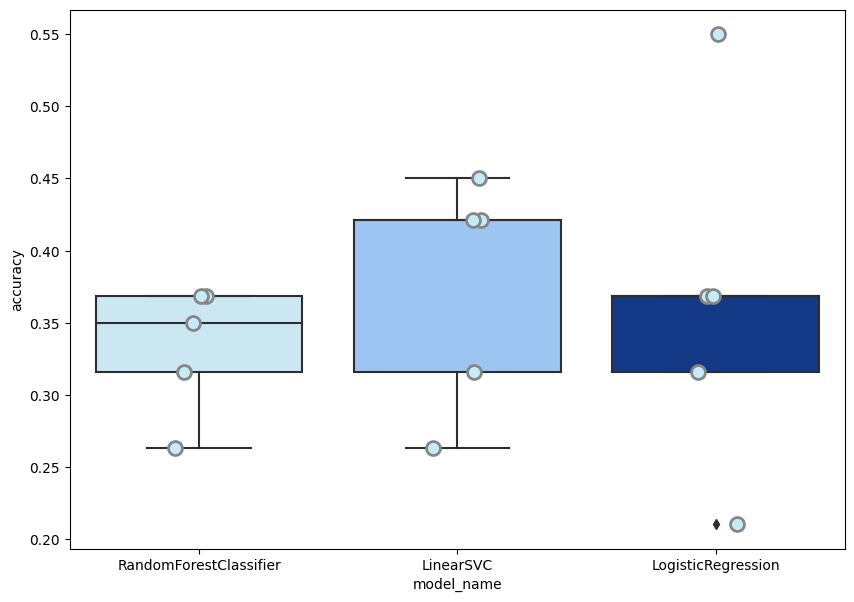

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
    
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
plt.subplots(figsize = (10,7))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

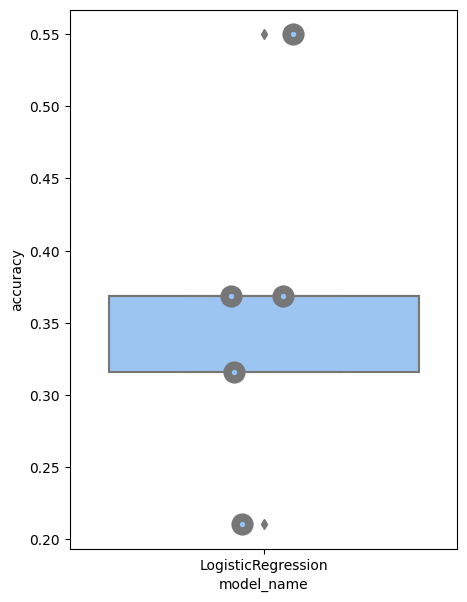

In [ ]:
sns.set_palette(['#8FC4FF','#003399'])

from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(random_state=0)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
plt.subplots(figsize = (5,7))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=6)

plt.show()

In [ ]:
# check the mean of the accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression    0.362632
Name: accuracy, dtype: float64

# Logistic Regression Model

In [ ]:
#creating a dict of Sentiment_val: sentiments to use with the confusion matrix
sentiment_id_df =df_train[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)

In [ ]:
# Instantiate the model
logisticRegr = LogisticRegression(random_state=0)
# Fit the model
logisticRegr.fit(X_train_tf, y_train)
#Predict
y_pred = logisticRegr.predict(X_test_tf)

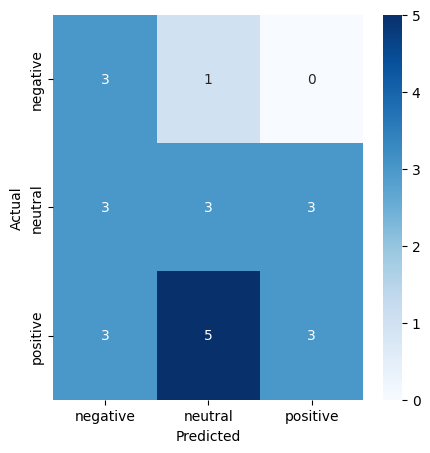

In [ ]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiments_val.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score')
accuracy_score(y_test,y_pred)

Accuracy Score


0.375

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.33      0.75      0.46         4
           0       0.33      0.33      0.33         9
           1       0.50      0.27      0.35        11

    accuracy                           0.38        24
   macro avg       0.39      0.45      0.38        24
weighted avg       0.41      0.38      0.36        24



In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test_tf, y_test)
print(score)

0.375


#Feature Importance

In [ ]:
 def plot_coefficients(classification, feature_names, top_features=20):
     size=len(feature_names)
     coef_neg = classification.coef_[-1][:size]
     coef_pos = classification.coef_[1][:size]
     top_positive_coefficients = np.argsort(coef_pos[coef_pos>0])[-top_features:]
     top_negative_coefficients = np.argsort(coef_pos[coef_neg<0])[:top_features]
     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     coef=np.hstack([coef_neg,coef_pos])
     # create plot
     plt.figure(figsize=(15, 5))
     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
     feature_names = np.array(feature_names)
     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
     title="Positive and Negative Labels"
     plt.title(title)
     plt.show()

In [ ]:
 #coefs_with_fns = sorted(zip(logisticRegr.coef_[0], feature_names)) 
 #df_feat=pd.DataFrame(coefs_with_fns)
 #df_feat.columns='coefficient','word'
 #df_feat.sort_values(by='coefficient')

#plot_coefficients(logisticRegr, feature_names)

#MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Instantiate the model
nb = MultinomialNB()
# Fit the model
nb.fit(X_train_tf, y_train)
# predict
y_pred_nb = nb.predict(X_test_tf)

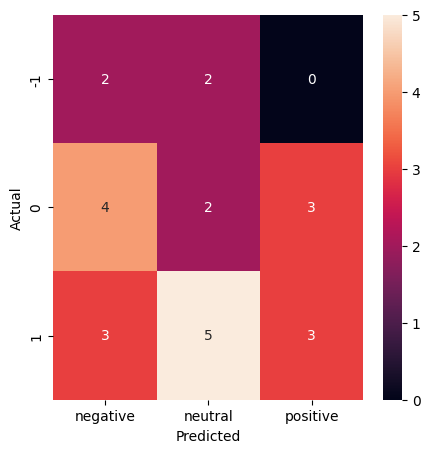

In [ ]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.22      0.50      0.31         4
           0       0.22      0.22      0.22         9
           1       0.50      0.27      0.35        11

    accuracy                           0.29        24
   macro avg       0.31      0.33      0.29        24
weighted avg       0.35      0.29      0.30        24



In [ ]:
# Use score method to get accuracy of model
nb_score = nb.score(X_test_tf, y_test)
print(score)

0.375


In [ ]:
#validate the model
df_val= df_val.reset_index()
df_val.tail()

,index,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val,day
25,23815,2019-09-04,HumanityForYang,@AndrewYang Some ways that we can implement #Y...,"[#YangsClimatePlan, #GeoEngineering, #YangGang]","[way, implement, yangsclimateplan, work, geoen...",way implement yangsclimateplan work geoenginee...,9.0,2019.0,1,positive,04
26,7580,2018-09-02,whizkid7,Elon Musk made enough money to not be concerne...,[#Tesla],"[elon, musk, make, enough, money, concern, con...",elon musk make enough money concern concern ea...,9.0,2018.0,-1,negative,02
27,1021,2018-02-25,tsport100,Bernie Ecclestone urges Formula One to make bo...,NaN,"[bernie, ecclestone, urge, formula, one, make,...",bernie ecclestone urge formula one make bold s...,2.0,2018.0,-1,negative,25
28,21486,2019-08-22,QuentinWillson,Commons Science and Technology Committee MPs s...,NaN,"[common, science, technology, committee, mp, s...",common science technology committee mp say ele...,8.0,2019.0,-1,negative,22
29,27055,2019-11-04,IntEngineering,Although electric cars may seem to be a new in...,NaN,"[although, electric, car, may, seem, new, inno...",although electric car may seem new innovation ...,11.0,2019.0,0,neutral,04


In [ ]:
df_cars

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val,day
2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0,1,positive,31
4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...,1.0,2018.0,0,neutral,31
5,2018-01-31,DunkenKBliths,At the crossroads...\n\nIn the near future whe...,"[#ev, #electricvehicles, #tesla, #animals, #el...","[crossroad, near, future, electric, car, auton...",crossroad near future electric car autonomous ...,1.0,2018.0,0,neutral,31
6,2018-01-31,FullyChargedDan,"VW plans to produce 1,500 electric cars per da...",NaN,"[vw, plan, produce, electric, car, per, day, z...",vw plan produce electric car per day zwickau f...,1.0,2018.0,-1,negative,31
7,2018-01-31,TEConnectivity,"Steven Merkt, President Transportation Solutio...",NaN,"[steven, merkt, president, transportation, sol...",steven merkt president transportation solution...,1.0,2018.0,1,positive,31
...,...,...,...,...,...,...,...,...,...,...,...
43977,2020-12-01,NVanSpartan,My sons grade 8 science project. Electric cars...,NaN,"[son, grade, science, project, electric, car, ...",son grade science project electric car v gas m...,12.0,2020.0,-1,negative,01
43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...,12.0,2020.0,1,positive,01
43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...,12.0,2020.0,1,positive,01
43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...,12.0,2020.0,0,neutral,01


#Testing the model

In [ ]:
# create new df contains the sentiment and its encoded value, and create two dictionaries
sentiment_id_df =df_cars[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)
print("sentiment_to_id: ",sentiment_to_id)
id_to_sentiment = dict(sentiment_id_df[['sentiment', 'sentiments_val']].values)
print("id_to_sentiment: ",id_to_sentiment)

sentiment_to_id:  {'negative': -1, 'neutral': 0, 'positive': 1}
id_to_sentiment:  {-1: 'negative', 0: 'neutral', 1: 'positive'}


In [ ]:
#df_cars=pd.DataFrame(df_cars,range(len(df_cars)))
#df_cars

In [ ]:
#df_cars.tweet[308]

In [ ]:
tweet = df_cars["tweet"][308]
tweet

'$NVA $FAT #LITHIUM\n\nElon Musk quipped "lithium was only the “salt on the salad” for the batteries for electric cars. MANY PEOPLE OVERESTIMATE the simplicity of supply coming on. All of which suggests the hunt for the “salt” may intensify further."\n\nhttps://t.co/f9WaG5KJf7'

In [ ]:
# test the data
clean=vectorizer.transform([tweet]) #apply TFIDF
pred=logisticRegr.predict(clean) # predict the tweet using out model
pred=id_to_sentiment[pred[0]]
print(pred)

negative


#Validate the model

In [ ]:
# Define our X and y
X_val = df_val['cleaned_tweet']
y_val = df_val['sentiment']

In [ ]:
# vectorize the model
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')

In [ ]:
X_val_tf= vectorizer.fit_transform(X_val.reset_index()['cleaned_tweet']).toarray()

In [ ]:
nb.fit(X_val_tf, y_val)

MultinomialNB()

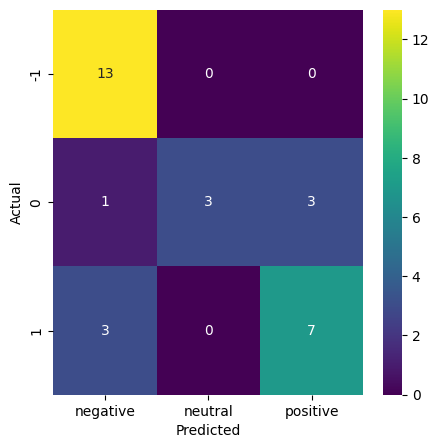

In [ ]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_val, nb.predict(X_val_tf))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='viridis',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_val,nb.predict(X_val_tf)))

              precision    recall  f1-score   support

          -1       0.76      1.00      0.87        13
           0       1.00      0.43      0.60         7
           1       0.70      0.70      0.70        10

    accuracy                           0.77        30
   macro avg       0.82      0.71      0.72        30
weighted avg       0.80      0.77      0.75        30



## Stocks

In [ ]:
#pip install yfinance
#pip install pandas_datareader

In [ ]:
# import the necessary libraries
import yfinance as yf
import datetime
import time
import requests
import io
import pandas as pd
%matplotlib inline
#rom matplotlib.pylab import rcParams
from sklearn import preprocessing

# For reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader

In [ ]:
# Insert stock data for pull from Yahoo Finance
ticker = "TSLA"
start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2020,12,31)

In [ ]:
# create empty df
stock_df = pd.DataFrame()

#Download stock price
stock = []
stock = yf.download(ticker, start= start_date, end= end_date, progress= False)
stock_df= stock_df.append(stock, sort= False)

# Add stock symbol column
stock_df['Symbol'] = ticker

In [ ]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,TSLA
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,TSLA
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,TSLA
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,TSLA
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,TSLA
...,...,...,...,...,...,...,...
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,TSLA
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,TSLA
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,TSLA


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2018-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
 6   Symbol     755 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB


Text(0, 0.5, 'Close Price')

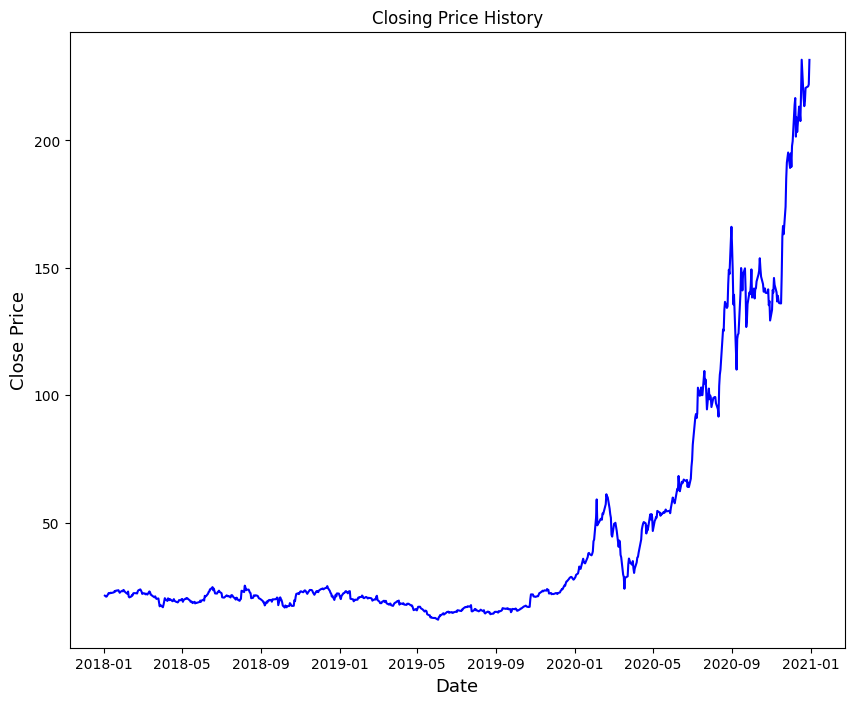

In [ ]:
# Plot the closing price history
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(stock_df['Close'], label = 'TSLA Closing Price History',color='blue')
plt.title('Closing Price History')
plt.xlabel('Date', fontsize= 13)
plt.ylabel('Close Price',fontsize= 13)

In [ ]:
stock_df=stock_df.reset_index()

In [ ]:
# adding two columns, one for month and one for year
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['month'] = stock_df['Date'].dt.month
stock_df['year'] = stock_df['Date'].dt.year
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,month,year
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,TSLA,1,2018
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,TSLA,1,2018
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,TSLA,1,2018
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,TSLA,1,2018
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,TSLA,1,2018
...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,TSLA,12,2020
751,2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,TSLA,12,2020
752,2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,TSLA,12,2020
753,2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,TSLA,12,2020


In [ ]:
stock_df.to_csv('TESLA_stock_prices.csv')

Sentiment V/s Stock Prices for Tesla Data

In [ ]:
df_cars.reset_index()

,index,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val,day
0,2,2018-01-31,DavidBrin,"Going where no car has gone before, at speeds ...","[#FalconHeavy, #SpaceX]","[go, car, go, speed, car, ever, reach, teslain...",go car go speed car ever reach teslainspace fa...,1.0,2018.0,1,positive,31
1,4,2018-01-31,plugshare,Volkswagen is serious about electric vehicle p...,"[#VW, #Volkswagen, #electricvehicle, #electric...","[volkswagen, serious, electric, vehicle, produ...",volkswagen serious electric vehicle production...,1.0,2018.0,0,neutral,31
2,5,2018-01-31,DunkenKBliths,At the crossroads...\n\nIn the near future whe...,"[#ev, #electricvehicles, #tesla, #animals, #el...","[crossroad, near, future, electric, car, auton...",crossroad near future electric car autonomous ...,1.0,2018.0,0,neutral,31
3,6,2018-01-31,FullyChargedDan,"VW plans to produce 1,500 electric cars per da...",NaN,"[vw, plan, produce, electric, car, per, day, z...",vw plan produce electric car per day zwickau f...,1.0,2018.0,-1,negative,31
4,7,2018-01-31,TEConnectivity,"Steven Merkt, President Transportation Solutio...",NaN,"[steven, merkt, president, transportation, sol...",steven merkt president transportation solution...,1.0,2018.0,1,positive,31
...,...,...,...,...,...,...,...,...,...,...,...,...
33850,43977,2020-12-01,NVanSpartan,My sons grade 8 science project. Electric cars...,NaN,"[son, grade, science, project, electric, car, ...",son grade science project electric car v gas m...,12.0,2020.0,-1,negative,01
33851,43979,2020-12-01,Pflax1,Electric cars are like pro cyclists who win th...,NaN,"[electric, car, like, pro, cyclist, win, tour,...",electric car like pro cyclist win tour de fran...,12.0,2020.0,1,positive,01
33852,43980,2020-12-01,AllanMargolin,A #ClimateChange Breakthrough For Electric Car...,[#ClimateChange],"[climatechange, breakthrough, electric, car, l...",climatechange breakthrough electric car leitma...,12.0,2020.0,1,positive,01
33853,43981,2020-12-01,FullyChargedDan,"“I suppose Climate Change is real, but Electri...",NaN,"[suppose, climate, change, real, electric, car...",suppose climate change real electric car expen...,12.0,2020.0,0,neutral,01


(1938, 11)

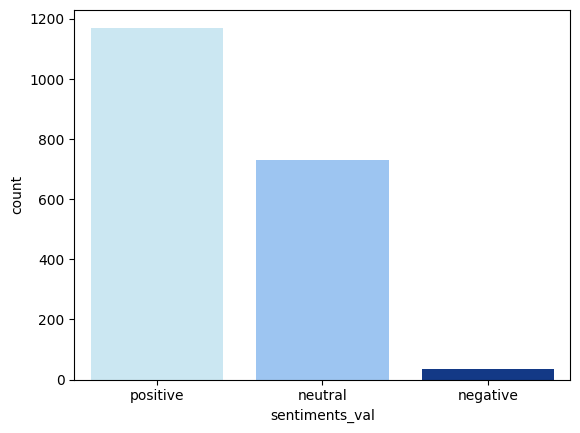

In [ ]:
#Plotting a chart of Tesla vs its respective sentiments on twitter across years
sns.set_palette(palette=['#C5EAF8','#8FC4FF','#003399'])
data_list=[" tesla "," teslarati "]
#using regex to filter all tweets having above mentioned keywords
pattern="|".join(data_list)
tesla_df=df_cars[df_cars["cleaned_tweet"].str.contains(pattern)]
tesla_df=tesla_df.sort_values('sentiment',ascending=False)
sns.countplot(x=tesla_df["sentiments_val"])
tesla_df.shape

## Year on Year Basis

In [ ]:
#Grouping the tweets as per their respective years
# differencing the sentiment using .sum() since it is ranging between -1 and 1
tesla_yr_df=tesla_df.groupby(['year'])["sentiment"].sum()

In [ ]:
tesla_yr_df=tesla_yr_df.reset_index()
tesla_yr_df

,year,sentiment
0,2018.0,283
1,2019.0,419
2,2020.0,433


In [ ]:
#Grouping the stock records as per their respective years
stock_yr_df=stock_df.groupby(["year"])["Adj Close"].mean().reset_index()
stock_yr_df

,year,Adj Close
0,2018,21.153995
1,2019,18.235347
2,2020,96.115857


In [ ]:
#Merging tesla sentiment dataFrame and stock records on year column
t1=pd.merge(tesla_yr_df,stock_yr_df, on="year", how="inner")
t1

,year,sentiment,Adj Close
0,2018.0,283,21.153995
1,2019.0,419,18.235347
2,2020.0,433,96.115857


In [ ]:
#scaling down the data
X = preprocessing.MinMaxScaler()
scaled_yr_df= pd.DataFrame(X.fit_transform(t1.iloc[:,1:]),columns=t1.columns[1:])
scaled_yr_df["year"]=t1["year"]

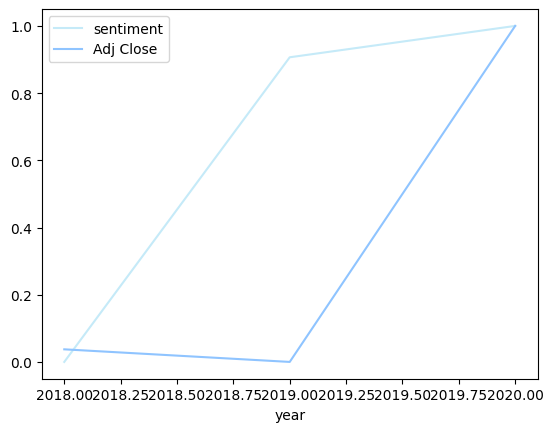

In [ ]:
scaled_yr_df.set_index('year').plot();
# We are supposed to perform this on yearly whole data but here, since we are performing this on just one month data  - HERE we are !

## Month on Month Basis

In [ ]:
#Grouping the tweets as per their respective months
# differencing the sentiment using .sum() since it is ranging between -1 and 1
tesla_month_df=tesla_df.groupby(['year','month'])["sentiment"].sum()
tesla_month_df=tesla_month_df.reset_index()
tesla_month_df

,year,month,sentiment
0,2018.0,1.0,20
1,2018.0,2.0,19
2,2018.0,3.0,9
3,2018.0,4.0,6
4,2018.0,5.0,19
5,2018.0,6.0,21
6,2018.0,7.0,30
7,2018.0,8.0,28
8,2018.0,9.0,56
9,2018.0,10.0,27


In [ ]:
#Grouping the stock records as per their respective months
stock_month_df=stock_df.groupby(["year","month"])["Adj Close"].mean().reset_index()
stock_month_df

,year,month,Adj Close
0,2018,1,22.572222
1,2018,2,22.385158
2,2018,3,21.065555
3,2018,4,19.318190
4,2018,5,19.323485
5,2018,6,22.373365
6,2018,7,20.798317
7,2018,8,22.080957
8,2018,9,19.343193
9,2018,10,18.999536


In [ ]:
t2=pd.merge(tesla_month_df,stock_month_df, on=["month",'year'], how="inner")
t2

,year,month,sentiment,Adj Close
0,2018.0,1.0,20,22.572222
1,2018.0,2.0,19,22.385158
2,2018.0,3.0,9,21.065555
3,2018.0,4.0,6,19.318190
4,2018.0,5.0,19,19.323485
5,2018.0,6.0,21,22.373365
6,2018.0,7.0,30,20.798317
7,2018.0,8.0,28,22.080957
8,2018.0,9.0,56,19.343193
9,2018.0,10.0,27,18.999536


In [ ]:
#scaling down the data
X = preprocessing.MinMaxScaler()
scaled_month_df= pd.DataFrame(X.fit_transform(t2.iloc[:,1:]),columns=t2.columns[1:])
scaled_month_df["year"]=t2["year"]
scaled_month_df

,month,sentiment,Adj Close,year
0,0.000000,0.28,0.042121,2018.0
1,0.090909,0.26,0.041175,2018.0
2,0.181818,0.06,0.034498,2018.0
3,0.272727,0.00,0.025656,2018.0
4,0.363636,0.26,0.025683,2018.0
5,0.454545,0.30,0.041115,2018.0
6,0.545455,0.48,0.033145,2018.0
7,0.636364,0.44,0.039636,2018.0
8,0.727273,1.00,0.025783,2018.0
9,0.818182,0.42,0.024044,2018.0


<Axes: >

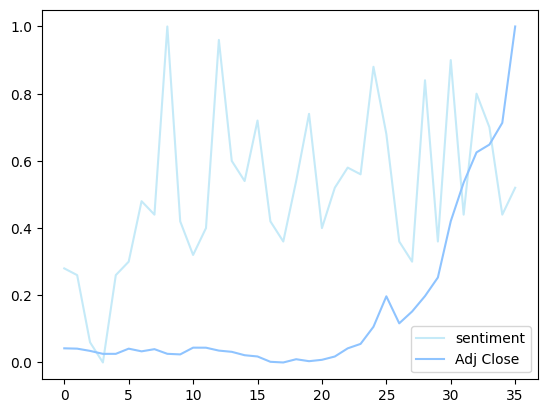

In [ ]:
scaled_month_df[scaled_month_df.columns.values[1:3]].plot()

In [ ]:
n=len(stock_df); n

755

In [ ]:
def logret(close,n):
  lrt=[]
  for i in range(n):
    try:
      temp=np.log(close[i]/close[i-1])
      lrt.append(temp)
    except: lrt.append(np.nan)
  
  return lrt

In [ ]:
stock_df['log_return']=logret(stock_df.Close,n)
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,month,year,log_return
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,TSLA,1,2018,NaN
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,TSLA,1,2018,-0.010286
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,TSLA,1,2018,-0.008325
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,TSLA,1,2018,0.006210
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,TSLA,1,2018,0.060755
...,...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,TSLA,12,2020,0.008769
751,2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,TSLA,12,2020,0.024150
752,2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,TSLA,12,2020,0.002897
753,2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,TSLA,12,2020,0.003460


In [ ]:
tesla_df

,date,username,tweet,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val,day
22111,2019-08-07,teslaownersSV,Jay Leno loves his Tesla: 'There's almost no r...,NaN,"[jay, leno, love, tesla, ', ', almost, reason,...",jay leno love tesla ' ' almost reason gas car ',8.0,2019.0,1,positive,07
27278,2019-12-31,James_P77,@Bito_Roberto @Teslarati “A car (or automobile...,NaN,"[roberto, car, automobile, wheel, motor, vehic...",roberto car automobile wheel motor vehicle use...,12.0,2019.0,1,positive,31
27177,2019-11-02,HansLak,Do we need electric cars that drive 235 miles ...,"[#eMobility, #Tesla]","[need, electric, car, drive, mile, per, hour, ...",need electric car drive mile per hour emobilit...,11.0,2019.0,1,positive,02
27130,2019-11-04,evcarmike,Just what do @welcomebreak achieve by runn...,NaN,"[achieve, run, constant, ad, huge, oxford, msa...",achieve run constant ad huge oxford msa screen...,11.0,2019.0,1,positive,04
27120,2019-11-04,USATODAY,"Once completed, Ford will join electric car ma...",NaN,"[complete, ford, join, electric, car, maker, t...",complete ford join electric car maker tesla in...,11.0,2019.0,1,positive,04
...,...,...,...,...,...,...,...,...,...,...,...
39160,2020-10-25,zei_squirrel,"""YO GET THIS ELON MUSK IS LIKE MY HERO BRO HE ...",NaN,"[yo, get, elon, musk, like, hero, bro, invent,...",yo get elon musk like hero bro invent electric...,10.0,2020.0,-1,negative,25
8183,2018-10-17,InsideEVs,The massive success of the Tesla Model 3 has p...,NaN,"[massive, success, tesla, model, push, towards...",massive success tesla model push towards batte...,10.0,2018.0,-1,negative,17
17055,2019-05-19,mdad8200,@Lebeaucarnews Gas cars are more then 10\nTime...,NaN,"[gas, car, time, likely, catch, fire, va, tesl...",gas car time likely catch fire va tesla bmw ne...,5.0,2019.0,-1,negative,19
4474,2018-06-17,evannex_com,Prince Charles test drives a #Tesla while host...,"[#Tesla, #TeslaMotors, #ElectricVehicle, #Elon...","[prince, charles, test, drive, tesla, host, ki...",prince charles test drive tesla host kimbal mu...,6.0,2018.0,-1,negative,17


In [ ]:
X = preprocessing.StandardScaler()
scaled_month_df= pd.DataFrame(X.fit_transform(t2.iloc[:,1:]),columns=t2.columns[1:])
scaled_month_df["year"]=t2["year"]
scaled_month_df

,month,sentiment,Adj Close,year
0,-1.593255,-0.980031,-0.471365,2018.0
1,-1.303572,-1.065046,-0.475268,2018.0
2,-1.013890,-1.915193,-0.502808,2018.0
3,-0.724207,-2.170237,-0.539274,2018.0
4,-0.434524,-1.065046,-0.539164,2018.0
5,-0.144841,-0.895016,-0.475515,2018.0
6,0.144841,-0.129884,-0.508385,2018.0
7,0.434524,-0.299913,-0.481617,2018.0
8,0.724207,2.080499,-0.538752,2018.0
9,1.013890,-0.384928,-0.545924,2018.0


In [ ]:
df_logs=stock_df.groupby(['year','month'])['log_return'].mean().reset_index()
df_logs

,year,month,log_return
0,2018,1,0.005010
1,2018,2,-0.001698
2,2018,3,-0.012091
3,2018,4,0.004726
4,2018,5,-0.001441
5,2018,6,0.008859
6,2018,7,-0.006668
7,2018,8,0.000510
8,2018,9,-0.006865
9,2018,10,0.010529


Text(0, 0.5, 'Average Monthly Log Returns')

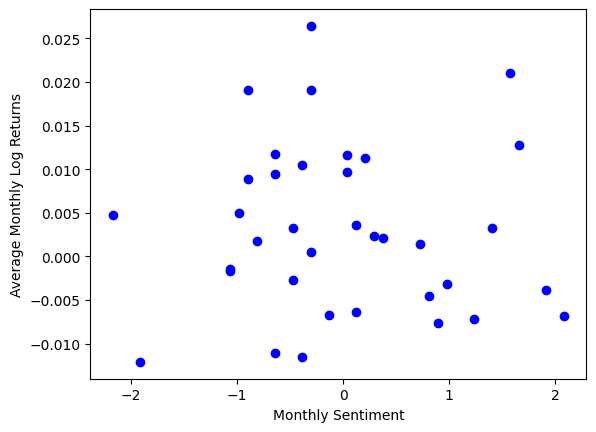

In [ ]:
plt.scatter(scaled_month_df.sentiment,df_logs.log_return,color='blue')
plt.xlabel('Monthly Sentiment')
plt.ylabel('Average Monthly Log Returns')

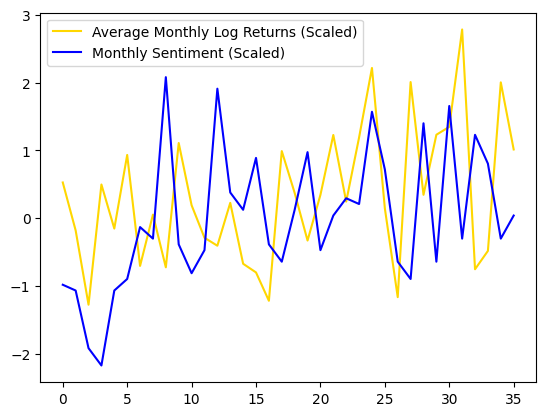

In [ ]:
plt.plot(df_logs.log_return/np.std(df_logs.log_return),color='gold')
plt.plot(scaled_month_df.sentiment,color='blue')
plt.legend(['Average Monthly Log Returns (Scaled)','Monthly Sentiment (Scaled)'])

In [ ]:
from scipy.stats import pearsonr as cor
cor(scaled_month_df.sentiment,df_logs.log_return)

PearsonRResult(statistic=-0.04098799298720905, pvalue=0.8123865556110587)

In [ ]:
w2v_model.wv[['goal','electric']]

array([[-1.76204601e-03, -2.47806823e-03, -2.85587832e-03,
         1.07759552e-03,  6.39600737e-04,  9.95449227e-05,
         1.62105123e-03,  2.09855521e-03, -1.53485383e-03,
        -4.72923915e-04,  1.00820779e-03, -3.32005299e-03,
         5.70825723e-05, -9.97678435e-05, -1.50884793e-03,
         1.10599713e-03, -1.13114435e-03, -1.25184457e-03,
         1.50227908e-03,  1.41402088e-05, -2.00740853e-03,
         6.89385750e-04, -1.14964321e-03,  1.45392423e-03,
        -1.23112593e-04, -1.76234683e-03, -2.78371922e-03,
        -1.54099311e-03,  1.05548894e-03,  1.24518434e-03,
         2.18290300e-03, -9.71027242e-04,  2.77912617e-03,
         1.66937511e-03, -1.13064609e-03, -1.54943392e-03,
         4.78014146e-04,  1.69931771e-03, -1.95161905e-04,
        -2.28301296e-03,  1.78321719e-03, -3.17779777e-04,
        -3.13497474e-03, -2.05658353e-03,  5.15472901e-04,
         1.05694533e-04, -2.22297711e-03,  1.33443042e-03,
         9.05294437e-04,  1.82860298e-04, -2.83564162e-0